# Learning with Kernel Machines

## maximum margin classifiers

In order to generalize your model to work well with new data, you will use the "maximum margin principle," which stipulates that the best hyperplane is the one that maximizes the distance between the closest data points on either side of the boundary. In order to find such a hyperplane, you will use Support Vector Machines (SVM).

## Maximum Margin Hyperplane. 

You can have infinite hyperplanes splitting sets of positive and negative points, 

The Maximum Margin Hyperplane is exactly in the middle of the two sets. 

So that when new data is introduced, there is more room to fit in points on the appropriate side of the hyperplane. 

(If the hyperplane was close to points in either set of the training data, then there will more likelihood of mislabeling when new data is introduced)

*gamma* is th distance from the hyperplane to the closest points. 


## Finding the maximum margin

1. Formulate distance of a hyperplane to a point. 
   1.  W transpose (x + b) = 0
       1.  w is a vector that is orthogonal to the hyperplane


we have a point, x. 
How far is x from the hyperplane? 
d is a hyperplane that goes straight from the hyperplane to point x
length of vector d is the distance from point x to the hyperplane 
the length of a vector is the *L2 norm*, sqrt(d transpose d)
x(p) us the projection of x on the hyperplane (so the point on the hypeplane that is the L2 norm of vector d away from x)

note: all points on the hyperplane must satisfy w transpose x(p) + b = 0
note: x(p) = x - d
note: d is orthogonal to the hyperplane (just like w), making d a rescaled version of w, which makes: 
w transpose (x - alpha(w)) + b = 0
Alpha scales w
solve for alpha: 
a = w transpose (x + b) divided by w transpose w
d = a*w
length of d is sqrt(d transpose d)
which can be tranlated as: 
d = sqrt(pwr(a, 2) * (w transpose w))
which be translated as: 
d = abs(w transpose ( x + b)) divided by sqrt(w transpose w)
sqrt(w transpose w) === linalg.norm(w)

Gamma is what are trying to maximize in SVM: 

gamma(w, b) = min over all possible points x(abs(w.dot(x + b)) divided by linalg.norm(w))

so, we can replace x with: 
x transpose (x - d) + b = 0


min of the absolute value of the w vector transpose the point x (parameter) plus b.  

scipy.optimize.minimize(abs(w.dot(x + b)))

note: w dot w is the magnitude of w (the Euclidian Norm)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
import pandas as pd

In [ ]:
# write a function that provides the mininim distance over all possible points x(abs(w.dot(x + b)) divided by linalg.norm(w))
def distance(w, b, x):
    return np.abs(w.dot(x) + b) / np.linalg.norm(w)


The reason that the constraint works is: 

>= 1 means that every result has to be positive, so: 

-1 label has to have -1 prediction
1 label has to have 1 prediction 

(opposite signs would result in negative -)

note: as we shrink w, the distance to x (d) increases

the solution to SVM is when you maximize the distance (d)




we have to use **slack variables** when no straight hyperplane exists (because the data is not linearly separable)

psi(i) is a positive term that we want to make as small as possible. 

we are going to minimize the sum of all psi(i)

lowering c allows for some "slack", which provides some leeway for data points that aren't linearly separable (mislabeled)



you can remove constraints from optimization problem.  



In [3]:
import scipy.optimize as optimize




optimize.optimize(1 - y[i] *(x.dot(w) + b), 0)

the l2 regularizer is the w.dot(w) that we are trying to minimize


Platt scaling makes SVM results into logical regression results. 

In [1]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Number of data points in each class
num_samples_per_class = 50

# Generate data for class y = -1
xTr_class_minus1 = np.random.uniform(0, 12, size=(num_samples_per_class, 1))
yTr_class_minus1 = np.full((num_samples_per_class, 1), -1)

# Generate data for class y = 1
xTr_class_1 = np.random.uniform(0, 12, size=(num_samples_per_class, 1))
yTr_class_1 = np.full((num_samples_per_class, 1), 1)

# Concatenate the two sets to get the final training data
xTr = np.vstack((xTr_class_minus1, xTr_class_1))
yTr = np.vstack((yTr_class_minus1, yTr_class_1))

# Shuffle the data
indices = np.arange(xTr.shape[0])
np.random.shuffle(indices)
xTr = xTr[indices]
yTr = yTr[indices]

# Print the first few data points to check the generated data
print("xTr:", xTr[:5])
print("yTr:", yTr[:5])

xTr: [[11.38662645]
 [ 0.69700335]
 [ 1.43513095]
 [ 3.90219986]
 [ 2.54806933]]
yTr: [[-1]
 [-1]
 [ 1]
 [ 1]
 [-1]]


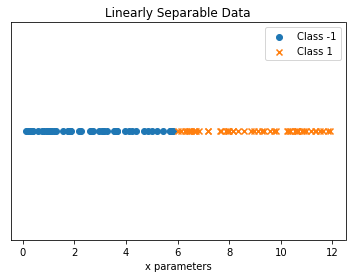

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points for each class
num_samples = 50

# Generate linearly separable data for class -1
xTr_class_minus1 = np.random.uniform(0, 6, size=(num_samples,))  # Parameters between 0 and 6
yTr_class_minus1 = np.full((num_samples,), -1)  # Labels set to -1

# Generate linearly separable data for class 1
xTr_class_1 = np.random.uniform(6, 12, size=(num_samples,))  # Parameters between 6 and 12
yTr_class_1 = np.full((num_samples,), 1)  # Labels set to 1

# Combine the two classes into the final training data
xTr = np.concatenate((xTr_class_minus1, xTr_class_1))
yTr = np.concatenate((yTr_class_minus1, yTr_class_1))

# Shuffle the data to mix the classes
shuffle_idx = np.random.permutation(len(xTr))
xTr = xTr[shuffle_idx]
yTr = yTr[shuffle_idx]

# Plot the data
plt.scatter(xTr[yTr == -1], np.zeros_like(xTr[yTr == -1]), label='Class -1', marker='o')
plt.scatter(xTr[yTr == 1], np.zeros_like(xTr[yTr == 1]), label='Class 1', marker='x')
plt.xlabel('x parameters')
plt.yticks([])  # Hide y-axis ticks
plt.legend()
plt.title('Linearly Separable Data')
plt.show()

NameError: name 'visualize_2D' is not defined